In [30]:
import os
import nltk
from nltk import pos_tag, word_tokenize
from collections import defaultdict
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nadim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nadim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/nadim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# returns adjectives and nouns from each book 
def categorize_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
    
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(text) if word.isalpha()]
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    # Tag parts of speech
    tagged = pos_tag(tokens)

    # Separate adjectives and nouns
    adjectives = [word for word, pos in tagged if pos.startswith('JJ')]
    nouns = [word for word, pos in tagged if pos.startswith('NN')]

    return adjectives, nouns

In [32]:
books_dir = 'books'
# create dictonaries to hold the words and their counts 
richard_adjectives = defaultdict(int)
richard_nouns = defaultdict(int)
stephen_adjectives = defaultdict(int)
stephen_nouns = defaultdict(int)

In [33]:
# extract adjective and noun counts from each book 
for filename in os.listdir(books_dir):
    if filename.endswith('.txt'):
        adjectives, nouns = categorize_words(os.path.join(books_dir, filename))
        
        if filename.startswith('richard'):
            for adj in adjectives:
                richard_adjectives[adj] += 1
            for noun in nouns:
                richard_nouns[noun] += 1

        elif filename.startswith('stephen'):
            for adj in adjectives:
                stephen_adjectives[adj] += 1
            for noun in nouns:
                stephen_nouns[noun] += 1

In [34]:
# sort all the lists 

sorted_stephen_nouns = sorted(stephen_nouns.items(), key=lambda x: x[1], reverse=True)
sorted_stephen_adjectives = sorted(stephen_adjectives.items(), key=lambda x: x[1], reverse=True)

sorted_richard_nouns = sorted(richard_nouns.items(), key=lambda x: x[1], reverse=True)
sorted_richard_adjectives = sorted(richard_adjectives.items(), key=lambda x: x[1], reverse=True)

# print("Stephen King - Nouns (sorted):", sorted_stephen_nouns)
# print("Stephen King - Adjectives (sorted):", sorted_stephen_adjectives)

# print("Richard Bachman - Nouns (sorted):", sorted_richard_nouns)
# print("Richard Bachman - Adjectives (sorted):", sorted_richard_adjectives)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
# formats data correclty for plot 
def prepare_data_for_plot(sorted_data, author_name):
    return [(word, count, author_name) for word, count in sorted_data]

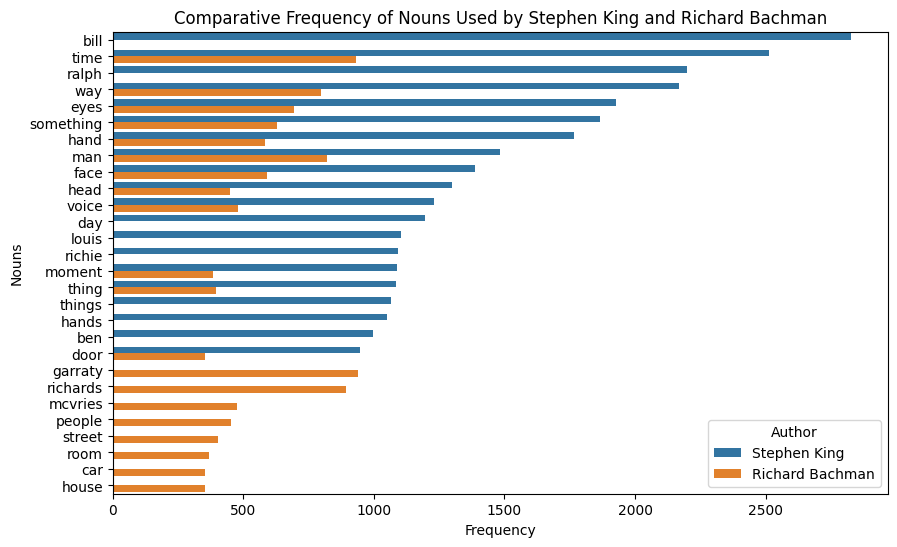

In [37]:
# take top 20 words 
top_20_stephen_nouns = sorted_stephen_nouns[:20]
top_20_richard_nouns = sorted_richard_nouns[:20]

stephen_data = prepare_data_for_plot(top_20_stephen_nouns, 'Stephen King')
richard_data = prepare_data_for_plot(top_20_richard_nouns, 'Richard Bachman')

combined_data = stephen_data + richard_data
df = pd.DataFrame(combined_data, columns=['Word', 'Frequency', 'Author'])

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', hue='Author', data=df)

# Add titles and labels
plt.title('Comparative Frequency of Nouns Used by Stephen King and Richard Bachman')
plt.xlabel('Frequency')
plt.ylabel('Nouns')

# Show the plot
plt.show()

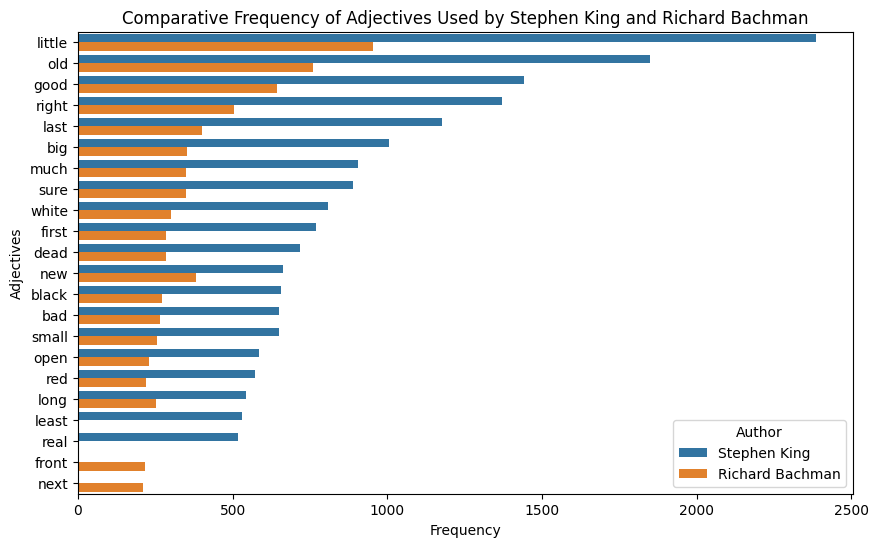

In [38]:
top_20_stephen_adjectives = sorted_stephen_adjectives[:20]
top_20_richard_adjectives = sorted_richard_adjectives[:20]


stephen_data = prepare_data_for_plot(top_20_stephen_adjectives, 'Stephen King')
richard_data = prepare_data_for_plot(top_20_richard_adjectives, 'Richard Bachman')

combined_data = stephen_data + richard_data
df = pd.DataFrame(combined_data, columns=['Word', 'Frequency', 'Author'])

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', hue='Author', data=df)

# Add titles and labels
plt.title('Comparative Frequency of Adjectives Used by Stephen King and Richard Bachman')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')

# Show the plot
plt.show()